In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

melbourne = pd.read_csv('/Users/cptnemo2005/Desktop/SEIR/population_basecase.csv', sep=',',header=None)
pop       = melbourne.values
pop       = np.nan_to_num(pop, copy = True)
pop       = pop.astype(int)

od_matrix = genfromtxt('/Users/cptnemo2005/Desktop/SEIR/OD_Matrix_basecase.csv', delimiter=',')
od_matrix = np.reshape(od_matrix, (12,309,309))
od_matrix = np.nan_to_num(od_matrix, copy = True)
od_matrix = od_matrix.astype(int)

pop = pop*4
od_matrix = od_matrix*4

for i in range(1,12):
    pop[i,:] = pop[0,:]

to_this_origin   = np.sum(od_matrix,axis = 1)
from_this_origin = np.sum(od_matrix,axis = 2)

to_this_origin

from_this_origin

np.sum(pop,axis = 1)

pop = pop + to_this_origin - from_this_origin

#At this point only have 25% for pop and flow, now we scale them up



In [67]:
total = np.sum(to_this_origin,axis= 0)


print(np.sum(total,axis= 0))

17779540


In [61]:
print(np.sum(from_this_origin,axis= 0))

[ 33664  66332  46328  98144  49592   8652  65744  59736  53228  45640
  34188  36136  73132  50636 136624 168784  43300  37532 112552  72076
  29684  52756  43864  76564  49316  90084  42804  34308  66752   3692
  61356  33480  33892  65656  47788  29360  23604  62932 106440 116256
   8744  54092  58784  48588  38264  43028  12568  72788  70396  89100
  93960  52768  50648  61460 121236  47944  77940  50208  42952  70908
  46824  48548  76812    844  25776 108108  73404  67476  42812  52252
  60536  16360  46308  46712  59736  43448  21444  79376  81196  96168
  31136  60528  16768  99276  45988  54728  64384    692  44984  95624
 105508  23164 107792  20516 178296  41280  60388  36528  46708  72528
  41700  40260  73592  18516  34212  45864  37096  47680  65848  76080
    684  69952  16560  61104  41176  77472  67572  20140  41740  43548
  67004  51872  93516  37448  98780  23224  42928  19072  37652  48892
  16516  79368  69284  89532 133724  58020  29972  93960  27156  56428
  9470

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

melbourne = pd.read_csv('/Users/cptnemo2005/Desktop/SEIR/population_staggered_work_hour.csv', sep=',',header=None)
pop       = melbourne.values
pop       = np.nan_to_num(pop, copy = True)
pop       = pop.astype(int)

od_matrix = genfromtxt('/Users/cptnemo2005/Desktop/SEIR/OD_Matrix_staggered_work_hour.csv', delimiter=',')
od_matrix = np.reshape(od_matrix, (12,309,309))
od_matrix = np.nan_to_num(od_matrix, copy = True)
od_matrix = od_matrix.astype(int)
pop = pop*4
od_matrix = od_matrix*4

for i in range(1,12):
    pop[i,:] = pop[0,:]

to_this_origin   = np.sum(od_matrix,axis = 1)
from_this_origin = np.sum(od_matrix,axis = 2)

to_this_origin

from_this_origin

np.sum(pop,axis = 1)

pop = pop + to_this_origin - from_this_origin
#At this point only have 25% for pop and flow, now we scale them up

In [64]:
total = np.sum(to_this_origin,axis= 0)


print(np.sum(total,axis= 0))

17355928


In [65]:
total = np.sum(from_this_origin,axis= 0)


print(np.sum(total,axis= 0))

17355928


In [25]:
np.sum(pop,axis = 1)

array([4632672, 4632672, 4632672, 4632672, 4632672, 4632672, 4632672,
       4632672, 4632672, 4632672, 4632672, 4632672])

In [53]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt
def sir_plot(res):
    plt.plot(res[::12,0], color='r',label='Susceptible')
    plt.plot(res[::12,1], color='g',label='Infectous')
    plt.plot(res[::12,2], color='b',label='Recovered')
    plt.plot(res[::12,3], color='y',label='Hospital')     
    plt.legend()

from collections import namedtuple


Param = namedtuple('Param', 'R0 DI I0 HospitalisationRate HospiterIters')
r = od_matrix.shape[0]
n = pop.shape[1]
N = 4632672.0
import random

random.seed(30)


OD_id = [p for p in range (0,309)]
# Take 20 random location
initialInd = random.sample(OD_id, 20)

initial = np.zeros(n)
#Each location has 10 people infected at the beginning
initial[initialInd] = 15

model = Param(R0 = 2.4, DI = 5.2*12, I0 = initial, HospitalisationRate=0.1,HospiterIters=15*12)

%run virus-sim.py

alpha = np.ones(od_matrix.shape)
iterations = 800
res = {}
inf = 10
res['baseline'] = sir(model,pop,od_matrix,alpha,iterations,inf)

/Users/cptnemo2005/Desktop/SEIR/virus-sim.py:56: RuntimeWarning: invalid value encountered in true_divide
  realflow = realflow / realflow.sum(axis=2)[:,:, np.newaxis]


In [54]:
newI_staggered = res['baseline'][2]

newI_staggered.astype(int)

newI_staggered = np.sum(newI_staggered,axis=0)

In [51]:
newI_base = res['baseline'][2]

newI_base.astype(int)

newI_base = np.sum(newI_base,axis=0)

In [55]:
newI = newI_staggered - newI_base

In [56]:
newI

array([-6.63893620e+01, -1.24661469e+02, -1.13546662e+02, -4.56591744e+01,
       -5.59380209e+01, -5.67280319e+01,  1.54851563e+01,  6.29461971e+02,
       -8.98186053e+02, -2.97472267e+01,  2.75916666e+02, -7.91679322e+01,
       -4.72368162e+02,  6.10819165e+01, -4.47176197e+02,  4.84430131e+01,
       -3.06196985e+02, -2.35604017e+02,  3.88255814e+02, -3.31701963e+02,
       -8.56367930e+01, -3.59814659e+01, -1.37331929e+02, -1.15721121e+02,
        6.60410331e+01, -1.25849662e+03, -6.41163101e+01, -6.96497334e+01,
       -1.82660390e+02, -2.89122519e+01, -3.01388630e+02, -3.34733217e+01,
       -7.02002879e+01,  1.56775182e+02, -1.94596205e+02, -6.42136008e+01,
       -2.15561609e+01, -1.01704934e+02, -9.51516507e+02, -6.47548674e+02,
        2.51428799e+01,  4.85831069e+01,  1.52419326e+02, -6.89147369e+01,
       -1.25642712e+02, -2.21760532e+02, -2.61950844e+01, -3.12975687e+02,
       -3.76441258e+02, -3.01370712e+02, -1.21424993e+03, -9.88087446e+01,
       -8.54993932e+01, -

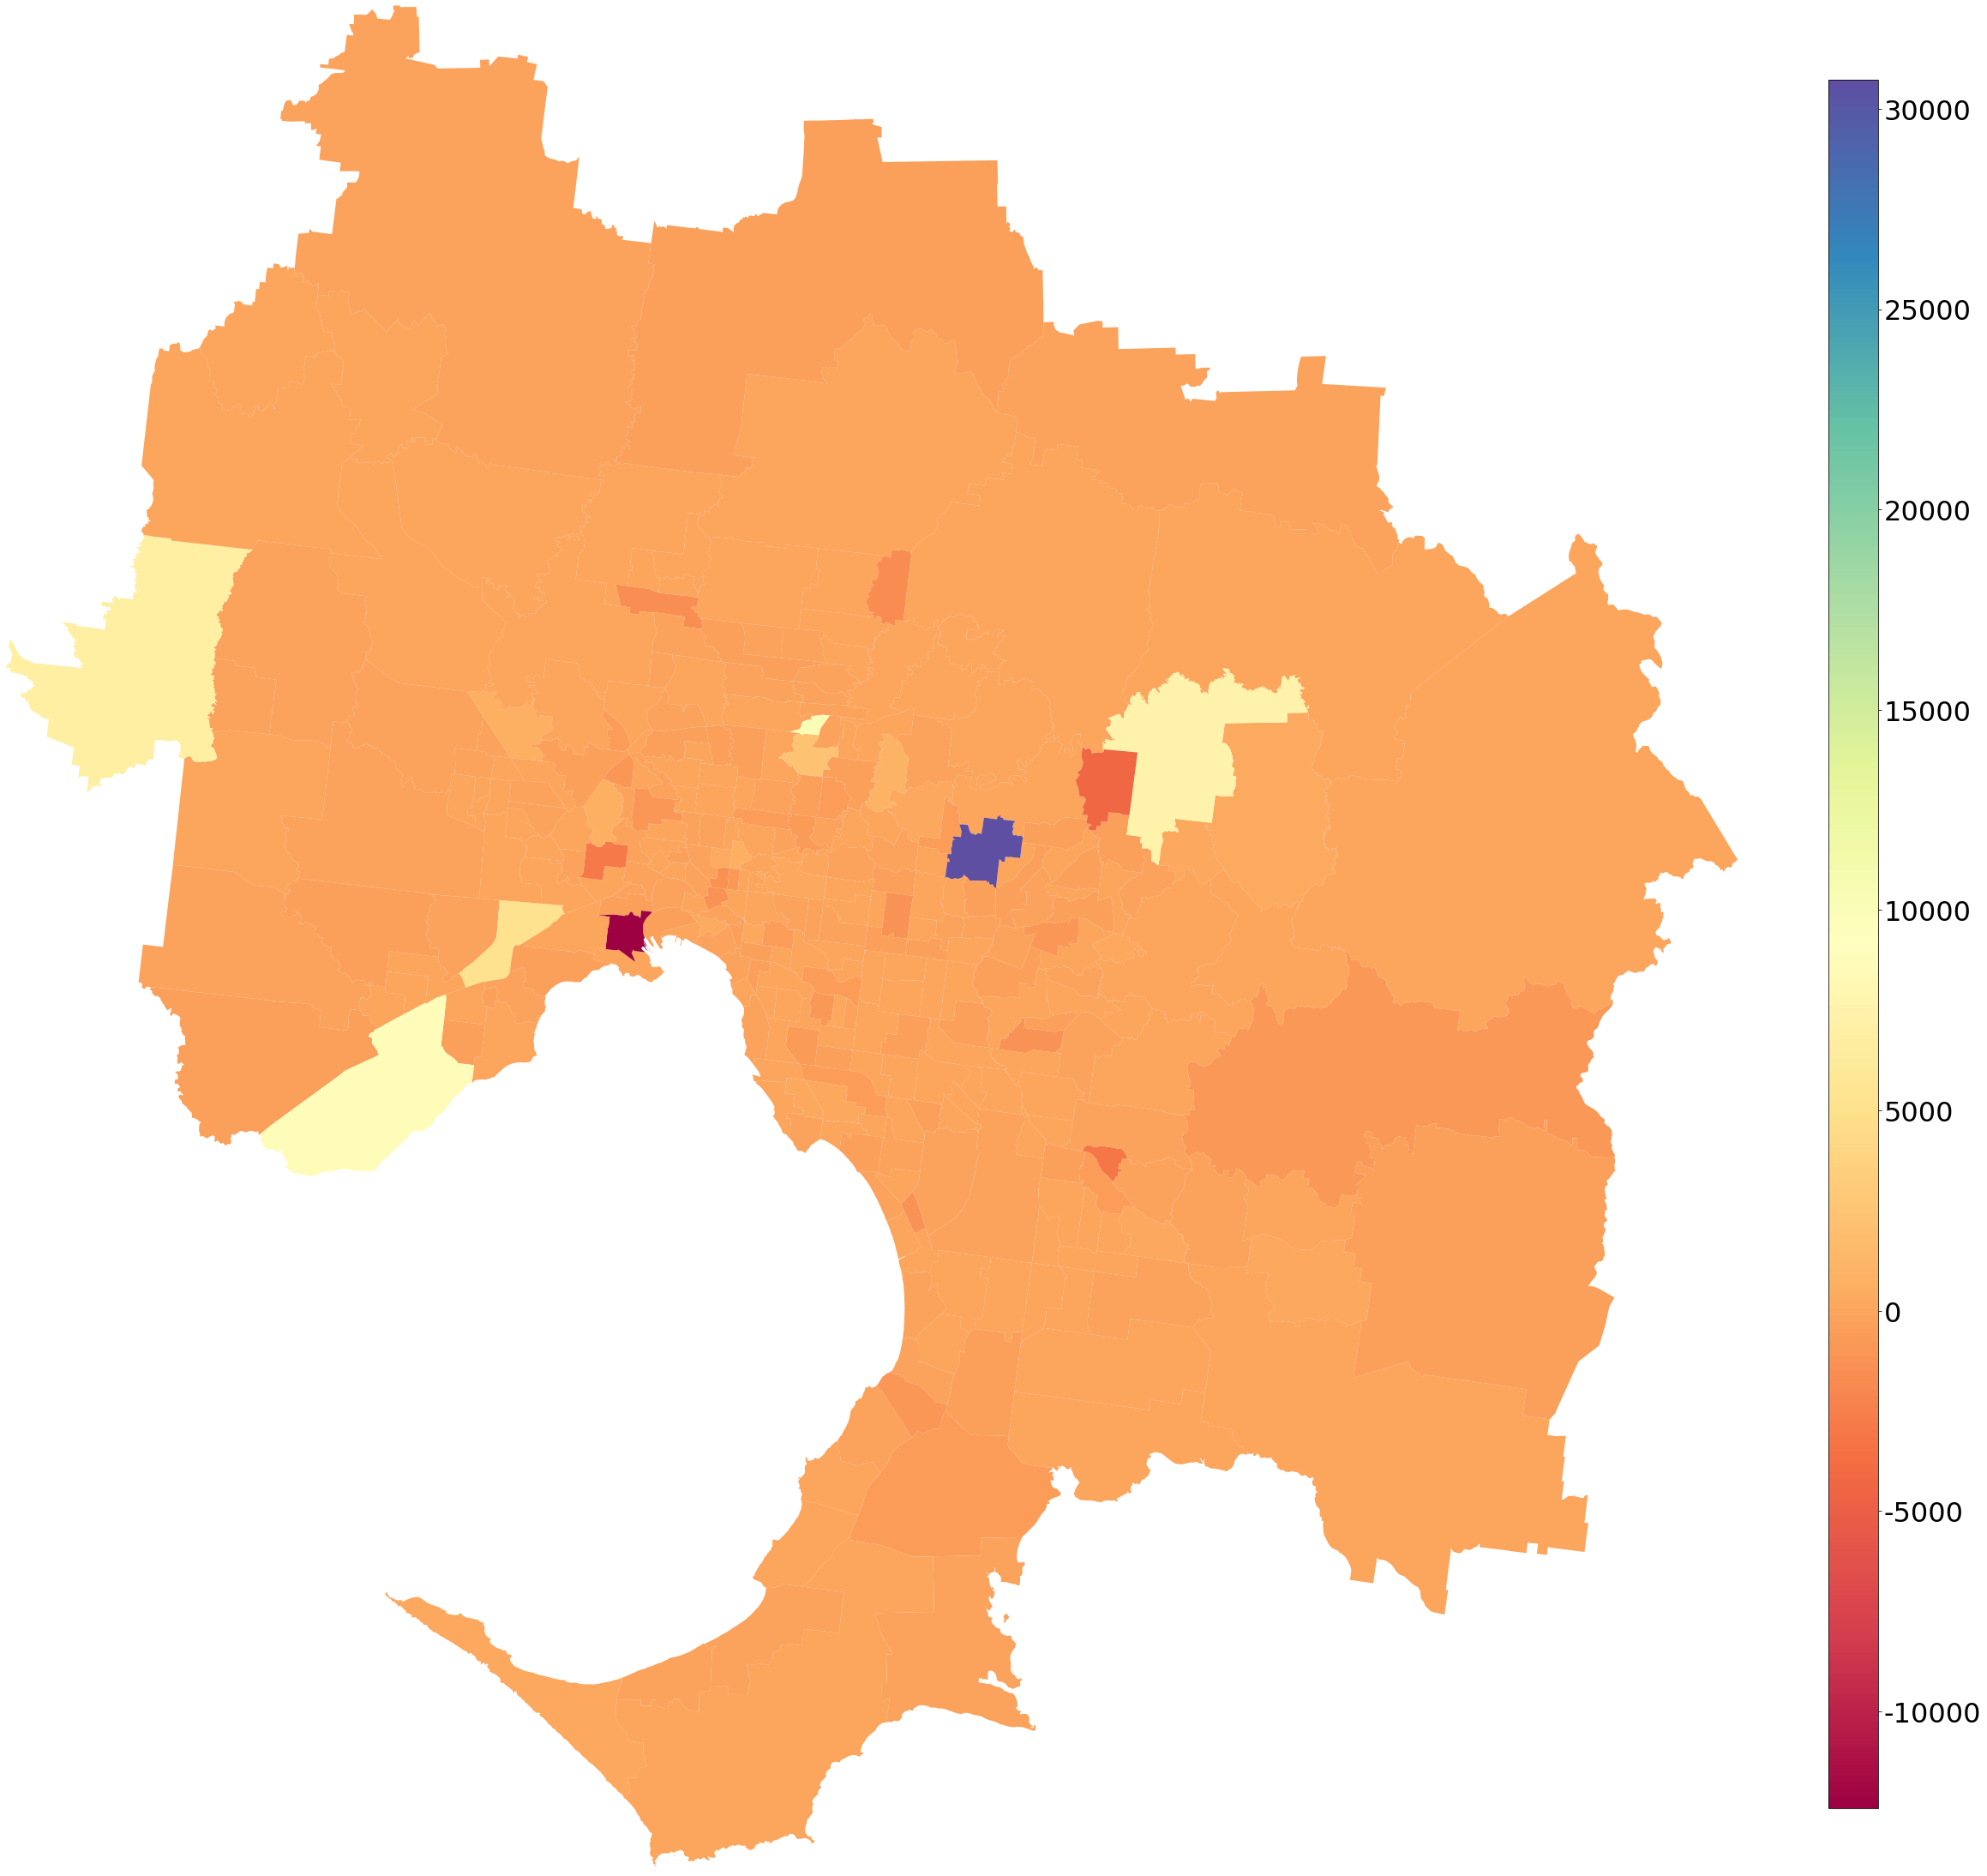

In [57]:
import geopandas as gpd
import contextily as ctx

melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI


plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Spectral')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Spectral',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig('base_staggered_wrok_{}.jpg'.format(iterations))
plt.show()